In [56]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [58]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [59]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [60]:
tf.keras.backend.clear_session()

In [61]:
subject = 'Pará - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [62]:
data = pd.read_csv('2003_raw_Pará_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - População,Pará - INCC (%),Pará - IPCA - Variação mensal durante o Plano Real (%),Pará - IGP-DI,Pará - Taxa Selic (%),Pará - IDH - Longevidade,Pará - IDH - Renda,Pará - IDH - Educação,Pará - NFSP - Fluxo Mensal (Milhões de reais),Pará - Estoque liquido de capital fixo - (R$),Pará - Desemprego,Pará - Produção de Cimento (t),Pará - Valor,Pará - Consumo de Cimento (t)
0,2003-01-01,3.785855e+06,1.992822e+06,0.586619,2.443525e+06,6453683.0,1.70,12.53,2.70,0.082293,0.725,0.601,0.319,3.46,6.098524e+06,10.770494,NaN,NaN,84701.0
1,2003-02-01,3.785855e+06,1.992822e+06,0.586619,2.443525e+06,6453683.0,1.51,2.25,2.17,0.088771,0.725,0.601,0.319,3.59,6.172460e+06,10.770494,32871.0,NaN,80221.0
2,2003-03-01,3.785855e+06,1.992822e+06,0.586619,2.443525e+06,6453683.0,1.39,3.86,1.59,0.090733,0.725,0.601,0.319,3.84,6.172460e+06,10.770494,48669.0,NaN,76122.0
3,2003-04-01,3.785855e+06,1.992822e+06,0.586619,2.443525e+06,6453683.0,1.38,5.13,1.66,0.092749,0.725,0.601,0.319,3.95,6.172460e+06,10.770494,114467.0,NaN,76544.0
4,2003-05-01,3.785855e+06,1.992822e+06,0.586619,2.443525e+06,6453683.0,0.90,6.15,0.41,0.092758,0.725,0.601,0.319,4.06,6.172460e+06,10.770494,104306.0,NaN,83445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,7.254461e+06,1.224076e+07,0.853716,4.174709e+06,8513497.0,0.58,2.42,-0.01,0.024620,0.790,0.650,0.660,0.69,7.827728e+06,12.300000,295080.0,0.5656,109761.0
200,2019-09-01,7.254461e+06,1.224076e+07,0.853716,4.174709e+06,8513497.0,0.42,2.54,-0.51,0.022751,0.790,0.650,0.660,0.62,7.827728e+06,12.000000,31724.0,0.5620,120188.0
201,2019-10-01,7.254461e+06,1.224076e+07,0.853716,4.174709e+06,8513497.0,0.46,2.49,0.50,0.022035,0.790,0.650,0.660,0.59,7.827728e+06,11.900000,74308.0,0.5704,131620.0
202,2019-11-01,7.254461e+06,1.224076e+07,0.853716,4.174709e+06,8513497.0,0.18,2.60,0.55,0.020790,0.790,0.650,0.660,0.57,7.827728e+06,11.700000,14373.0,0.5684,125374.0


In [63]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      115.365
1       90.229
2       87.897
3       96.273
4       97.686
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Pará - Consumo de Cimento (t), Length: 204, dtype: float64

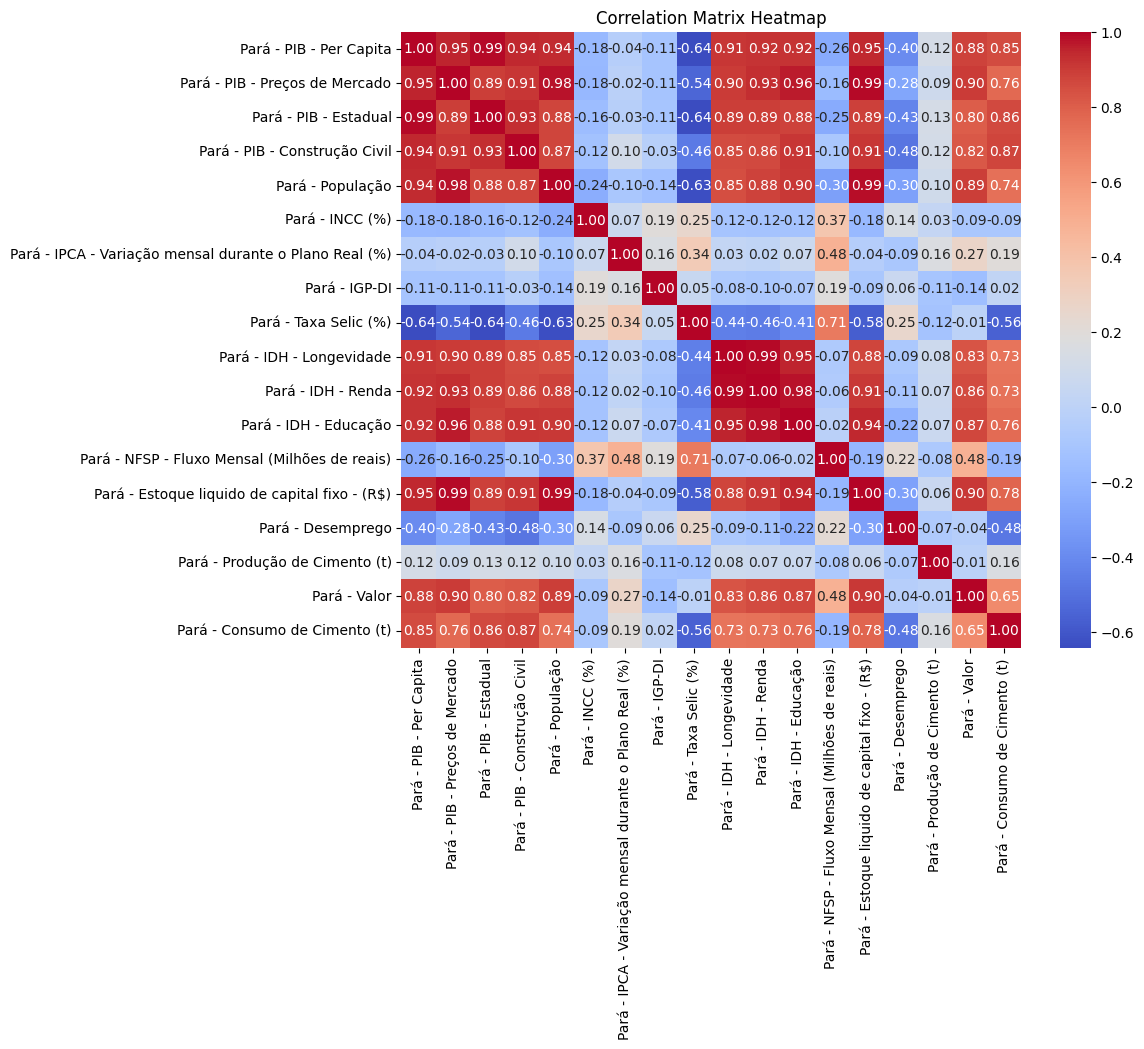

In [64]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [65]:
input_data = data.fillna(0.0).iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - População,Pará - INCC (%),Pará - IPCA - Variação mensal durante o Plano Real (%),Pará - IGP-DI,Pará - Taxa Selic (%),Pará - IDH - Longevidade,Pará - IDH - Renda,Pará - IDH - Educação,Pará - NFSP - Fluxo Mensal (Milhões de reais),Pará - Estoque liquido de capital fixo - (R$),Pará - Desemprego,Pará - Produção de Cimento (t),Pará - Valor
0,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.998868,4.052332,3.466715,2.303195,-0.923705,-0.926030,-0.912388,3.108599,-1.539424,1.202853,-0.583359,-1.563282
1,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.647487,-0.596188,2.630940,2.745235,-0.923705,-0.926030,-0.912388,3.275709,-1.411460,1.202853,-0.467490,-1.563282
2,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.425561,0.131839,1.716318,2.879123,-0.923705,-0.926030,-0.912388,3.597074,-1.411460,1.202853,-0.411804,-1.563282
3,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.407068,0.706121,1.826703,3.016721,-0.923705,-0.926030,-0.912388,3.738475,-1.411460,1.202853,-0.179870,-1.563282
4,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,0.519367,1.167355,-0.144465,3.017322,-0.923705,-0.926030,-0.912388,3.879875,-1.411460,1.202853,-0.215687,-1.563282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.810792,1.573954,0.447277,0.126599,1.528322,-0.590259,-0.966985,-1.264088,-0.729479,1.311065,1.564962,1.384082,-0.374997,1.441346,1.989415,0.128431,0.884308
176,0.810792,1.573954,0.447277,0.126599,1.528322,-0.479297,-0.881068,-0.412544,-0.941281,1.311065,1.564962,1.384082,-0.439270,1.441346,1.989415,-0.464456,0.883453
177,0.810792,1.573954,0.447277,0.126599,1.528322,-1.034110,-0.808718,0.186692,-1.140710,1.311065,1.564962,1.384082,-0.503543,1.441346,1.989415,-0.273411,0.881742
178,0.810792,1.573954,0.447277,0.126599,1.528322,-0.571766,-0.614276,-0.633314,-1.226481,1.311065,1.564962,1.384082,-0.503543,1.441346,2.059052,-0.517365,0.890297


In [66]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - População,Pará - INCC (%),Pará - IPCA - Variação mensal durante o Plano Real (%),Pará - IGP-DI,Pará - Taxa Selic (%),Pará - IDH - Longevidade,Pará - IDH - Renda,Pará - IDH - Educação,Pará - NFSP - Fluxo Mensal (Milhões de reais),Pará - Estoque liquido de capital fixo - (R$),Pará - Desemprego,Pará - Produção de Cimento (t),Pará - Valor
0,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.998868,4.052332,3.466715,2.303195,-0.923705,-0.926030,-0.912388,3.108599,-1.539424,1.202853,-0.583359,-1.563282
1,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.647487,-0.596188,2.630940,2.745235,-0.923705,-0.926030,-0.912388,3.275709,-1.411460,1.202853,-0.467490,-1.563282
2,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.425561,0.131839,1.716318,2.879123,-0.923705,-0.926030,-0.912388,3.597074,-1.411460,1.202853,-0.411804,-1.563282
3,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,1.407068,0.706121,1.826703,3.016721,-0.923705,-0.926030,-0.912388,3.738475,-1.411460,1.202853,-0.179870,-1.563282
4,-1.475487,-1.322400,-1.358046,-1.046629,-1.737693,0.519367,1.167355,-0.144465,3.017322,-0.923705,-0.926030,-0.912388,3.879875,-1.411460,1.202853,-0.215687,-1.563282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.942764,1.386943,0.698442,1.468693,1.353065,-0.238878,0.629248,-1.406012,0.272188,0.967254,0.973879,1.384082,0.794771,1.416222,-0.099716,-0.583359,0.856077
164,0.942764,1.386943,0.698442,1.468693,1.353065,-0.608753,0.837256,-0.112926,0.272188,0.967254,0.973879,1.384082,0.730498,1.416222,-0.030078,-0.583359,0.854366
165,0.942764,1.386943,0.698442,1.468693,1.353065,-0.534778,0.877953,-0.743700,0.272188,0.967254,0.973879,1.384082,0.743353,1.416222,0.039559,-0.583359,0.860354
166,0.942764,1.386943,0.698442,1.468693,1.353065,-0.756703,1.000045,-0.586006,0.248413,0.967254,0.973879,1.384082,0.614807,1.416222,0.039559,-0.583359,0.862921


In [67]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      115.365
1       90.229
2       87.897
3       96.273
4       97.686
        ...   
163    133.744
164    128.527
165    147.510
166    138.511
167    103.294
Name: Pará - Consumo de Cimento (t), Length: 168, dtype: float64

In [68]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [69]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [70]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - População,Pará - INCC (%),Pará - IPCA - Variação mensal durante o Plano Real (%),Pará - IGP-DI,Pará - Taxa Selic (%),Pará - IDH - Longevidade,Pará - IDH - Renda,Pará - IDH - Educação,Pará - NFSP - Fluxo Mensal (Milhões de reais),Pará - Estoque liquido de capital fixo - (R$),Pará - Desemprego,Pará - Produção de Cimento (t),Pará - Valor
132,1.395825,1.159750,1.479034,1.438340,0.984172,-0.960135,1.058830,0.297077,-0.755853,0.967254,0.973879,1.026377,-0.285015,0.834026,-1.213919,2.322657,0.759405
133,1.395825,1.159750,1.479034,1.438340,0.984172,0.482379,-1.364912,-0.160234,-0.688658,0.967254,0.973879,1.026377,-0.349288,1.129318,-0.865731,-0.345581,0.767960
134,1.395825,1.159750,1.479034,1.438340,0.984172,-0.534778,-1.052901,0.549386,-0.626634,0.967254,0.973879,1.026377,-0.374997,1.129318,-0.656818,-0.583359,0.786781
135,1.395825,1.159750,1.479034,1.438340,0.984172,-0.627247,-0.627842,1.542855,-0.571481,0.967254,0.973879,1.026377,-0.259306,1.129318,-0.796093,-0.583359,0.780793
136,1.395825,1.159750,1.479034,1.438340,0.984172,0.482379,-0.320352,-0.081387,-0.516512,0.967254,0.973879,1.026377,-0.053632,1.129318,-0.935368,-0.583359,0.785926
137,1.395825,1.159750,1.479034,1.438340,0.984172,2.646150,-0.107822,-1.500628,-0.510405,0.967254,0.973879,1.026377,0.023495,1.129318,-1.074644,-0.113277,0.791914
138,1.395825,1.159750,1.479034,1.438340,0.984172,0.075516,0.082098,-1.784477,-0.510405,0.967254,0.973879,1.026377,-0.002214,1.129318,-1.144281,-0.583359,0.809880
139,1.395825,1.159750,1.479034,1.438340,0.984172,0.241960,0.086620,-1.658322,-0.510405,0.967254,0.973879,1.026377,-0.143614,1.129318,-1.283557,-0.583359,0.812446
140,1.395825,1.159750,1.479034,1.438340,0.984172,-0.997122,0.204189,-0.696392,-0.510054,0.967254,0.973879,1.026377,-0.182178,1.129318,-1.422832,-0.583359,0.814157
141,1.395825,1.159750,1.479034,1.438340,0.984172,-0.867666,0.470982,-0.759469,-0.510405,0.967254,0.973879,1.026377,-0.105051,1.129318,-1.562107,-0.136457,0.809880


In [71]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [72]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [73]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(180, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [74]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [75]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1514945121, 119896164, 2727742709, 3589046663, 2231045314, 532219327, 4202195193, 3392556636, 800670245, 3826946591]


Step: 0 ___________________________________________
val_loss: 519.9581909179688
winner_seed: 1514945121


Step: 1 ___________________________________________
val_loss: 255.129638671875
winner_seed: 119896164


Step: 2 ___________________________________________
val_loss: 2.7534064732192853e+27


Step: 3 ___________________________________________
val_loss: 251.95443725585938
winner_seed: 3589046663


Step: 4 ___________________________________________
val_loss: 254.4199676513672


Step: 5 ___________________________________________
val_loss: 384.2844543457031


Step: 6 ___________________________________________
val_loss: 219.47598266601562
winner_seed: 4202195193


Step: 7 ___________________________________________
val_loss: 124.2860336303711
winner_seed: 3392556636


Step: 8 ___________________________________________
val_loss: 312.1297302246094


Step: 9 _________

In [76]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1595719333

Epoch 1/10000
4/4 [==============================] - 2s 123ms/step - loss: 17242.7539 - val_loss: 613.1000
Epoch 2/10000
4/4 [==============================] - 0s 10ms/step - loss: 1716.1837 - val_loss: 3008.4543
Epoch 3/10000
4/4 [==============================] - 0s 9ms/step - loss: 1219.4031 - val_loss: 1772.3044
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 1211.7488 - val_loss: 2683.1492
Epoch 5/10000
4/4 [==============================] - 0s 11ms/step - loss: 1218.4703 - val_loss: 1670.1725
Epoch 6/10000
4/4 [==============================] - 0s 12ms/step - loss: 1281.1293 - val_loss: 1449.2230
Epoch 7/10000
4/4 [==============================] - 0s 12ms/step - loss: 1219.1589 - val_loss: 1933.5042
Epoch 8/10000
4/4 [==============================] - 0s 12ms/step - loss: 1185.7078 - val_loss: 2936.5605
Epoch 9/10000
4/4 [==============================] - 0s 11ms/step - loss: 1266.3402 - val_loss: 2155.3606
Epoch 10/10000
4/4 [===========================

Epoch 79/10000
4/4 [==============================] - 0s 8ms/step - loss: 852.1971 - val_loss: 1026.6930
Epoch 80/10000
4/4 [==============================] - 0s 9ms/step - loss: 355.6199 - val_loss: 769.4425
Epoch 81/10000
4/4 [==============================] - 0s 8ms/step - loss: 344.4443 - val_loss: 3763.1863
Epoch 82/10000
4/4 [==============================] - 0s 9ms/step - loss: 393.1747 - val_loss: 767.3830
Epoch 83/10000
4/4 [==============================] - 0s 9ms/step - loss: 624.7367 - val_loss: 1245.2772
Epoch 84/10000
4/4 [==============================] - 0s 9ms/step - loss: 374.4342 - val_loss: 681.9520
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 250.3692 - val_loss: 600.6835
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 257.0927 - val_loss: 606.5068
Epoch 87/10000
4/4 [==============================] - 0s 9ms/step - loss: 237.6374 - val_loss: 638.8612
Epoch 88/10000
4/4 [==============================] - 0s 9ms/

Epoch 157/10000
4/4 [==============================] - 0s 9ms/step - loss: 10222.3174 - val_loss: 2864.2051
Epoch 158/10000
4/4 [==============================] - 0s 8ms/step - loss: 1568.6183 - val_loss: 2060.9075
Epoch 159/10000
4/4 [==============================] - 0s 9ms/step - loss: 1324.2551 - val_loss: 1485.4122
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 1317.9905 - val_loss: 1837.1498
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 1189.2147 - val_loss: 1584.1956
Epoch 162/10000
4/4 [==============================] - 0s 9ms/step - loss: 1150.3331 - val_loss: 1361.1919
Epoch 163/10000
4/4 [==============================] - 0s 8ms/step - loss: 1093.7841 - val_loss: 1298.0397
Epoch 164/10000
4/4 [==============================] - 0s 8ms/step - loss: 1108.4453 - val_loss: 1751.1559
Epoch 165/10000
4/4 [==============================] - 0s 8ms/step - loss: 1074.8802 - val_loss: 1076.3027
Epoch 166/10000
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 677.3698 - val_loss: 1013.5104
Epoch 235/10000
4/4 [==============================] - 0s 9ms/step - loss: 639.8546 - val_loss: 1141.7988
Epoch 236/10000
4/4 [==============================] - 0s 8ms/step - loss: 645.5521 - val_loss: 1143.5742
Epoch 237/10000
4/4 [==============================] - 0s 9ms/step - loss: 738.9866 - val_loss: 1051.6809
Epoch 238/10000
4/4 [==============================] - 0s 8ms/step - loss: 669.7092 - val_loss: 969.9193
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 673.6966 - val_loss: 920.6671
Epoch 240/10000
4/4 [==============================] - 0s 8ms/step - loss: 665.8016 - val_loss: 910.4083
Epoch 241/10000
4/4 [==============================] - 0s 8ms/step - loss: 654.5343 - val_loss: 1121.7015
Epoch 242/10000
4/4 [==============================] - 0s 9ms/step - loss: 688.5301 - val_loss: 968.7943
Epoch 243/10000
4/4 [==============================] - 0s 9ms/step

4/4 [==============================] - 0s 9ms/step - loss: 548.4492 - val_loss: 888.6172
Epoch 312/10000
4/4 [==============================] - 0s 10ms/step - loss: 542.7914 - val_loss: 926.2186
Epoch 313/10000
4/4 [==============================] - 0s 11ms/step - loss: 568.6165 - val_loss: 814.8758
Epoch 314/10000
4/4 [==============================] - 0s 13ms/step - loss: 545.2200 - val_loss: 968.4976
Epoch 315/10000
4/4 [==============================] - 0s 10ms/step - loss: 543.2159 - val_loss: 1082.2552
Epoch 316/10000
4/4 [==============================] - 0s 10ms/step - loss: 541.5419 - val_loss: 793.5891
Epoch 317/10000
4/4 [==============================] - 0s 9ms/step - loss: 545.8370 - val_loss: 908.6420
Epoch 318/10000
4/4 [==============================] - 0s 11ms/step - loss: 538.5722 - val_loss: 808.7660
Epoch 319/10000
4/4 [==============================] - 0s 11ms/step - loss: 581.3557 - val_loss: 937.3390
Epoch 320/10000
4/4 [==============================] - 0s 9ms/s

Epoch 389/10000
4/4 [==============================] - 0s 8ms/step - loss: 494.5376 - val_loss: 870.2170
Epoch 390/10000
4/4 [==============================] - 0s 9ms/step - loss: 492.4429 - val_loss: 742.8663
Epoch 391/10000
4/4 [==============================] - 0s 9ms/step - loss: 492.0733 - val_loss: 752.2628
Epoch 392/10000
4/4 [==============================] - 0s 10ms/step - loss: 477.9638 - val_loss: 722.9940
Epoch 393/10000
4/4 [==============================] - 0s 9ms/step - loss: 496.6158 - val_loss: 734.1146
Epoch 394/10000
4/4 [==============================] - 0s 9ms/step - loss: 500.0257 - val_loss: 844.9230
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 507.6322 - val_loss: 717.3148
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step - loss: 522.1370 - val_loss: 757.1949
Epoch 397/10000
4/4 [==============================] - 0s 9ms/step - loss: 482.0421 - val_loss: 847.8583
Epoch 398/10000
4/4 [==============================] -

4/4 [==============================] - 0s 9ms/step - loss: 448.4657 - val_loss: 757.9800
Epoch 467/10000
4/4 [==============================] - 0s 9ms/step - loss: 441.0321 - val_loss: 859.3054
Epoch 468/10000
4/4 [==============================] - 0s 9ms/step - loss: 449.1051 - val_loss: 751.2095
Epoch 469/10000
4/4 [==============================] - 0s 9ms/step - loss: 445.3542 - val_loss: 744.4506
Epoch 470/10000
4/4 [==============================] - 0s 9ms/step - loss: 440.4565 - val_loss: 737.9001
Epoch 471/10000
4/4 [==============================] - 0s 9ms/step - loss: 439.3451 - val_loss: 754.9328
Epoch 472/10000
4/4 [==============================] - 0s 8ms/step - loss: 450.2210 - val_loss: 809.8028
Epoch 473/10000
4/4 [==============================] - 0s 8ms/step - loss: 442.7951 - val_loss: 763.3756
Epoch 474/10000
4/4 [==============================] - 0s 9ms/step - loss: 442.0912 - val_loss: 758.2386
Epoch 475/10000
4/4 [==============================] - 0s 9ms/step - lo

Epoch 544/10000
4/4 [==============================] - 0s 10ms/step - loss: 432.9204 - val_loss: 759.2734
Epoch 545/10000
4/4 [==============================] - 0s 10ms/step - loss: 419.5852 - val_loss: 768.6678
Epoch 546/10000
4/4 [==============================] - 0s 10ms/step - loss: 424.1951 - val_loss: 815.9022
Epoch 547/10000
4/4 [==============================] - 0s 10ms/step - loss: 429.8444 - val_loss: 800.9374
Epoch 548/10000
4/4 [==============================] - 0s 10ms/step - loss: 425.4464 - val_loss: 775.7975
Epoch 549/10000
4/4 [==============================] - 0s 9ms/step - loss: 412.5255 - val_loss: 769.2170
Epoch 550/10000
4/4 [==============================] - 0s 9ms/step - loss: 412.9990 - val_loss: 784.9210
Epoch 551/10000
4/4 [==============================] - 0s 9ms/step - loss: 414.9877 - val_loss: 806.0488
Epoch 552/10000
4/4 [==============================] - 0s 9ms/step - loss: 416.8195 - val_loss: 772.4392
Epoch 553/10000
4/4 [=============================

Epoch 622/10000
4/4 [==============================] - 0s 10ms/step - loss: 384.5864 - val_loss: 693.0385
Epoch 623/10000
4/4 [==============================] - 0s 11ms/step - loss: 403.7129 - val_loss: 760.5240
Epoch 624/10000
4/4 [==============================] - 0s 12ms/step - loss: 407.8034 - val_loss: 695.7004
Epoch 625/10000
4/4 [==============================] - 0s 11ms/step - loss: 382.6762 - val_loss: 703.3475
Epoch 626/10000
4/4 [==============================] - 0s 12ms/step - loss: 402.4929 - val_loss: 669.3917
Epoch 627/10000
4/4 [==============================] - 0s 10ms/step - loss: 386.0639 - val_loss: 684.5027
Epoch 628/10000
4/4 [==============================] - 0s 10ms/step - loss: 384.4377 - val_loss: 686.1980
Epoch 629/10000
4/4 [==============================] - 0s 10ms/step - loss: 394.5292 - val_loss: 669.2101
Epoch 630/10000
4/4 [==============================] - 0s 10ms/step - loss: 381.9218 - val_loss: 676.0034
Epoch 631/10000
4/4 [=========================

4/4 [==============================] - 0s 11ms/step - loss: 355.5919 - val_loss: 679.2032
Epoch 700/10000
4/4 [==============================] - 0s 11ms/step - loss: 382.3714 - val_loss: 668.7682
Epoch 701/10000
4/4 [==============================] - 0s 11ms/step - loss: 363.6066 - val_loss: 658.8326
Epoch 702/10000
4/4 [==============================] - 0s 11ms/step - loss: 354.3622 - val_loss: 695.4994
Epoch 703/10000
4/4 [==============================] - 0s 11ms/step - loss: 361.5362 - val_loss: 708.0897
Epoch 704/10000
4/4 [==============================] - 0s 11ms/step - loss: 362.7711 - val_loss: 627.0623
Epoch 705/10000
4/4 [==============================] - 0s 9ms/step - loss: 354.1083 - val_loss: 676.8958
Epoch 706/10000
4/4 [==============================] - 0s 9ms/step - loss: 359.2751 - val_loss: 626.9792
Epoch 707/10000
4/4 [==============================] - 0s 9ms/step - loss: 358.8953 - val_loss: 626.6309
Epoch 708/10000
4/4 [==============================] - 0s 9ms/ste

4/4 [==============================] - 0s 9ms/step - loss: 336.6866 - val_loss: 599.0842
Epoch 778/10000
4/4 [==============================] - 0s 9ms/step - loss: 340.2913 - val_loss: 597.8040
Epoch 779/10000
4/4 [==============================] - 0s 9ms/step - loss: 332.5370 - val_loss: 600.3872
Epoch 780/10000
4/4 [==============================] - 0s 9ms/step - loss: 336.6343 - val_loss: 586.8096
Epoch 781/10000
4/4 [==============================] - 0s 9ms/step - loss: 337.3925 - val_loss: 592.8122
Epoch 782/10000
4/4 [==============================] - 0s 9ms/step - loss: 334.7049 - val_loss: 587.6760
Epoch 783/10000
4/4 [==============================] - 0s 10ms/step - loss: 333.5793 - val_loss: 594.9769
Epoch 784/10000
4/4 [==============================] - 0s 9ms/step - loss: 337.9498 - val_loss: 581.4211
Epoch 785/10000
4/4 [==============================] - 0s 9ms/step - loss: 330.5925 - val_loss: 585.3488
Epoch 786/10000
4/4 [==============================] - 0s 8ms/step - l

Epoch 855/10000
4/4 [==============================] - 0s 12ms/step - loss: 313.3686 - val_loss: 527.6298
Epoch 856/10000
4/4 [==============================] - 0s 11ms/step - loss: 317.3442 - val_loss: 534.9504
Epoch 857/10000
4/4 [==============================] - 0s 11ms/step - loss: 316.5506 - val_loss: 569.5090
Epoch 858/10000
4/4 [==============================] - 0s 11ms/step - loss: 315.8962 - val_loss: 576.0094
Epoch 859/10000
4/4 [==============================] - 0s 10ms/step - loss: 324.1219 - val_loss: 542.3302
Epoch 860/10000
4/4 [==============================] - 0s 9ms/step - loss: 313.8496 - val_loss: 558.1799
Epoch 861/10000
4/4 [==============================] - 0s 9ms/step - loss: 317.2954 - val_loss: 547.5341
Epoch 862/10000
4/4 [==============================] - 0s 10ms/step - loss: 322.0167 - val_loss: 565.8105
Epoch 863/10000
4/4 [==============================] - 0s 10ms/step - loss: 324.8768 - val_loss: 488.8775
Epoch 864/10000
4/4 [===========================

4/4 [==============================] - 0s 9ms/step - loss: 298.0085 - val_loss: 529.8378
Epoch 933/10000
4/4 [==============================] - 0s 9ms/step - loss: 308.7905 - val_loss: 647.0544
Epoch 934/10000
4/4 [==============================] - 0s 9ms/step - loss: 317.5084 - val_loss: 514.4617
Epoch 935/10000
4/4 [==============================] - 0s 9ms/step - loss: 299.1656 - val_loss: 504.8077
Epoch 936/10000
4/4 [==============================] - 0s 9ms/step - loss: 293.6732 - val_loss: 501.9300
Epoch 937/10000
4/4 [==============================] - 0s 9ms/step - loss: 298.8314 - val_loss: 533.9638
Epoch 938/10000
4/4 [==============================] - 0s 9ms/step - loss: 320.5645 - val_loss: 513.7344
Epoch 939/10000
4/4 [==============================] - 0s 8ms/step - loss: 297.1566 - val_loss: 493.6367
Epoch 940/10000
4/4 [==============================] - 0s 9ms/step - loss: 295.4616 - val_loss: 513.5842
Epoch 941/10000
4/4 [==============================] - 0s 9ms/step - lo

Epoch 1010/10000
4/4 [==============================] - 0s 9ms/step - loss: 280.4426 - val_loss: 496.5211
Epoch 1011/10000
4/4 [==============================] - 0s 10ms/step - loss: 275.3899 - val_loss: 498.5296
Epoch 1012/10000
4/4 [==============================] - 0s 9ms/step - loss: 278.3144 - val_loss: 504.3950
Epoch 1013/10000
4/4 [==============================] - 0s 9ms/step - loss: 273.1799 - val_loss: 488.5168
Epoch 1014/10000
4/4 [==============================] - 0s 10ms/step - loss: 274.5799 - val_loss: 516.5651
Epoch 1015/10000
4/4 [==============================] - 0s 10ms/step - loss: 274.9629 - val_loss: 512.5852
Epoch 1016/10000
4/4 [==============================] - 0s 9ms/step - loss: 277.1956 - val_loss: 613.9718
Epoch 1017/10000
4/4 [==============================] - 0s 9ms/step - loss: 278.2281 - val_loss: 485.1712
Epoch 1018/10000
4/4 [==============================] - 0s 9ms/step - loss: 272.9615 - val_loss: 479.5403
Epoch 1019/10000
4/4 [=====================

4/4 [==============================] - 0s 9ms/step - loss: 265.9886 - val_loss: 458.5670
Epoch 1088/10000
4/4 [==============================] - 0s 9ms/step - loss: 267.4059 - val_loss: 416.3393
Epoch 1089/10000
4/4 [==============================] - 0s 9ms/step - loss: 268.9950 - val_loss: 559.0200
Epoch 1090/10000
4/4 [==============================] - 0s 9ms/step - loss: 267.6792 - val_loss: 484.8546
Epoch 1091/10000
4/4 [==============================] - 0s 9ms/step - loss: 261.9037 - val_loss: 474.9723
Epoch 1092/10000
4/4 [==============================] - 0s 9ms/step - loss: 264.8925 - val_loss: 397.7642
Epoch 1093/10000
4/4 [==============================] - 0s 9ms/step - loss: 263.8563 - val_loss: 409.3667
Epoch 1094/10000
4/4 [==============================] - 0s 10ms/step - loss: 264.2924 - val_loss: 466.2138
Epoch 1095/10000
4/4 [==============================] - 0s 8ms/step - loss: 261.0865 - val_loss: 456.5120
Epoch 1096/10000
4/4 [==============================] - 0s 8ms

4/4 [==============================] - 0s 8ms/step - loss: 250.1492 - val_loss: 440.7082
Epoch 1165/10000
4/4 [==============================] - 0s 9ms/step - loss: 247.7552 - val_loss: 532.0441
Epoch 1166/10000
4/4 [==============================] - 0s 9ms/step - loss: 241.1119 - val_loss: 437.4635
Epoch 1167/10000
4/4 [==============================] - 0s 9ms/step - loss: 242.1329 - val_loss: 422.7628
Epoch 1168/10000
4/4 [==============================] - 0s 8ms/step - loss: 246.0995 - val_loss: 510.9044
Epoch 1169/10000
4/4 [==============================] - 0s 9ms/step - loss: 259.7216 - val_loss: 784.4969
Epoch 1170/10000
4/4 [==============================] - 0s 9ms/step - loss: 249.6226 - val_loss: 481.1568
Epoch 1171/10000
4/4 [==============================] - 0s 8ms/step - loss: 260.6225 - val_loss: 439.5905
Epoch 1172/10000
4/4 [==============================] - 0s 8ms/step - loss: 262.3797 - val_loss: 433.5216
Epoch 1173/10000
4/4 [==============================] - 0s 8ms/

4/4 [==============================] - 0s 8ms/step - loss: 228.6504 - val_loss: 445.3644
Epoch 1242/10000
4/4 [==============================] - 0s 8ms/step - loss: 228.4365 - val_loss: 518.6470
Epoch 1243/10000
4/4 [==============================] - 0s 8ms/step - loss: 232.6894 - val_loss: 536.2511
Epoch 1244/10000
4/4 [==============================] - 0s 8ms/step - loss: 235.2873 - val_loss: 539.4490
Epoch 1245/10000
4/4 [==============================] - 0s 9ms/step - loss: 228.8892 - val_loss: 465.7643
Epoch 1246/10000
4/4 [==============================] - 0s 9ms/step - loss: 229.0175 - val_loss: 533.0326
Epoch 1247/10000
4/4 [==============================] - 0s 10ms/step - loss: 227.5990 - val_loss: 475.0449
Epoch 1248/10000
4/4 [==============================] - 0s 9ms/step - loss: 225.8077 - val_loss: 556.3738
Epoch 1249/10000
4/4 [==============================] - 0s 9ms/step - loss: 231.6498 - val_loss: 425.0025
Epoch 1250/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 8ms/step - loss: 216.1515 - val_loss: 404.0563
Epoch 1319/10000
4/4 [==============================] - 0s 9ms/step - loss: 217.0404 - val_loss: 483.1467
Epoch 1320/10000
4/4 [==============================] - 0s 9ms/step - loss: 219.1368 - val_loss: 430.4099
Epoch 1321/10000
4/4 [==============================] - 0s 9ms/step - loss: 215.1384 - val_loss: 558.7080
Epoch 1322/10000
4/4 [==============================] - 0s 9ms/step - loss: 215.0211 - val_loss: 437.8420
Epoch 1323/10000
4/4 [==============================] - 0s 9ms/step - loss: 213.2863 - val_loss: 479.1907
Epoch 1324/10000
4/4 [==============================] - 0s 9ms/step - loss: 212.0114 - val_loss: 474.8544
Epoch 1325/10000
4/4 [==============================] - 0s 8ms/step - loss: 214.5581 - val_loss: 690.4497
Epoch 1326/10000
4/4 [==============================] - 0s 9ms/step - loss: 217.3862 - val_loss: 472.9344
Epoch 1327/10000
4/4 [==============================] - 0s 8ms/

4/4 [==============================] - 0s 9ms/step - loss: 203.5906 - val_loss: 457.0367
Epoch 1396/10000
4/4 [==============================] - 0s 8ms/step - loss: 203.5551 - val_loss: 495.6197
Epoch 1397/10000
4/4 [==============================] - 0s 8ms/step - loss: 205.4790 - val_loss: 490.0773
Epoch 1398/10000
4/4 [==============================] - 0s 9ms/step - loss: 202.7472 - val_loss: 484.6977
Epoch 1399/10000
4/4 [==============================] - 0s 9ms/step - loss: 201.3865 - val_loss: 360.4605
Epoch 1400/10000
4/4 [==============================] - 0s 10ms/step - loss: 205.8605 - val_loss: 568.5284
Epoch 1401/10000
4/4 [==============================] - 0s 8ms/step - loss: 201.2160 - val_loss: 374.4728
Epoch 1402/10000
4/4 [==============================] - 0s 8ms/step - loss: 201.0167 - val_loss: 513.7440
Epoch 1403/10000
4/4 [==============================] - 0s 9ms/step - loss: 202.0005 - val_loss: 349.7071
Epoch 1404/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 10ms/step - loss: 191.8699 - val_loss: 342.8118
Epoch 1473/10000
4/4 [==============================] - 0s 9ms/step - loss: 189.8264 - val_loss: 469.1687
Epoch 1474/10000
4/4 [==============================] - 0s 9ms/step - loss: 189.7150 - val_loss: 513.8876
Epoch 1475/10000
4/4 [==============================] - 0s 9ms/step - loss: 190.0508 - val_loss: 472.3158
Epoch 1476/10000
4/4 [==============================] - 0s 9ms/step - loss: 191.5533 - val_loss: 398.9693
Epoch 1477/10000
4/4 [==============================] - 0s 9ms/step - loss: 189.5127 - val_loss: 345.7350
Epoch 1478/10000
4/4 [==============================] - 0s 9ms/step - loss: 190.1161 - val_loss: 357.0620
Epoch 1479/10000
4/4 [==============================] - 0s 9ms/step - loss: 191.9763 - val_loss: 506.7086
Epoch 1480/10000
4/4 [==============================] - 0s 9ms/step - loss: 191.5607 - val_loss: 751.5443
Epoch 1481/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 10ms/step - loss: 180.9556 - val_loss: 342.3384
Epoch 1550/10000
4/4 [==============================] - 0s 9ms/step - loss: 183.5062 - val_loss: 418.4934
Epoch 1551/10000
4/4 [==============================] - 0s 9ms/step - loss: 179.0785 - val_loss: 436.2660
Epoch 1552/10000
4/4 [==============================] - 0s 9ms/step - loss: 181.1997 - val_loss: 358.1718
Epoch 1553/10000
4/4 [==============================] - 0s 9ms/step - loss: 179.3825 - val_loss: 330.4373
Epoch 1554/10000
4/4 [==============================] - 0s 9ms/step - loss: 177.5946 - val_loss: 378.8959
Epoch 1555/10000
4/4 [==============================] - 0s 9ms/step - loss: 179.1920 - val_loss: 432.3861
Epoch 1556/10000
4/4 [==============================] - 0s 9ms/step - loss: 181.6305 - val_loss: 332.5372
Epoch 1557/10000
4/4 [==============================] - 0s 9ms/step - loss: 178.4779 - val_loss: 387.8494
Epoch 1558/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 8ms/step - loss: 222.5364 - val_loss: 433.6508
Epoch 1627/10000
4/4 [==============================] - 0s 8ms/step - loss: 205.4318 - val_loss: 457.3899
Epoch 1628/10000
4/4 [==============================] - 0s 9ms/step - loss: 196.5237 - val_loss: 290.2957
Epoch 1629/10000
4/4 [==============================] - 0s 9ms/step - loss: 190.2917 - val_loss: 311.5802
Epoch 1630/10000
4/4 [==============================] - 0s 9ms/step - loss: 191.6359 - val_loss: 291.0929
Epoch 1631/10000
4/4 [==============================] - 0s 9ms/step - loss: 183.0533 - val_loss: 284.9347
Epoch 1632/10000
4/4 [==============================] - 0s 9ms/step - loss: 188.6054 - val_loss: 282.5233
Epoch 1633/10000
4/4 [==============================] - 0s 9ms/step - loss: 182.7478 - val_loss: 267.1193
Epoch 1634/10000
4/4 [==============================] - 0s 8ms/step - loss: 180.8726 - val_loss: 269.4488
Epoch 1635/10000
4/4 [==============================] - 0s 9ms/

4/4 [==============================] - 0s 9ms/step - loss: 168.6888 - val_loss: 271.5840
Epoch 1704/10000
4/4 [==============================] - 0s 9ms/step - loss: 168.9642 - val_loss: 416.9944
Epoch 1705/10000
4/4 [==============================] - 0s 9ms/step - loss: 164.0247 - val_loss: 341.0681
Epoch 1706/10000
4/4 [==============================] - 0s 10ms/step - loss: 162.7303 - val_loss: 503.2116
Epoch 1707/10000
4/4 [==============================] - 0s 9ms/step - loss: 168.8096 - val_loss: 937.0635
Epoch 1708/10000
4/4 [==============================] - 0s 9ms/step - loss: 174.1463 - val_loss: 277.6608
Epoch 1709/10000
4/4 [==============================] - 0s 9ms/step - loss: 161.9310 - val_loss: 288.7503
Epoch 1710/10000
4/4 [==============================] - 0s 8ms/step - loss: 167.5262 - val_loss: 259.9713
Epoch 1711/10000
4/4 [==============================] - 0s 9ms/step - loss: 162.5642 - val_loss: 310.3725
Epoch 1712/10000
4/4 [==============================] - 0s 8ms

4/4 [==============================] - 0s 9ms/step - loss: 153.8650 - val_loss: 405.2131
Epoch 1781/10000
4/4 [==============================] - 0s 9ms/step - loss: 153.2938 - val_loss: 430.8722
Epoch 1782/10000
4/4 [==============================] - 0s 9ms/step - loss: 154.6539 - val_loss: 407.7821
Epoch 1783/10000
4/4 [==============================] - 0s 9ms/step - loss: 153.5138 - val_loss: 602.5388
Epoch 1784/10000
4/4 [==============================] - 0s 9ms/step - loss: 151.3595 - val_loss: 453.5745
Epoch 1785/10000
4/4 [==============================] - 0s 8ms/step - loss: 149.9152 - val_loss: 411.2872
Epoch 1786/10000
4/4 [==============================] - 0s 9ms/step - loss: 156.6221 - val_loss: 500.0635
Epoch 1787/10000
4/4 [==============================] - 0s 8ms/step - loss: 155.7182 - val_loss: 581.1802
Epoch 1788/10000
4/4 [==============================] - 0s 9ms/step - loss: 156.4922 - val_loss: 433.1524
Epoch 1789/10000
4/4 [==============================] - 0s 8ms/

4/4 [==============================] - 0s 11ms/step - loss: 148.6730 - val_loss: 459.4866
Epoch 1858/10000
4/4 [==============================] - 0s 10ms/step - loss: 149.7032 - val_loss: 569.1825
Epoch 1859/10000
4/4 [==============================] - 0s 10ms/step - loss: 150.5247 - val_loss: 374.3030
Epoch 1860/10000
4/4 [==============================] - 0s 9ms/step - loss: 144.9335 - val_loss: 320.6108
Epoch 1861/10000
4/4 [==============================] - 0s 9ms/step - loss: 145.7514 - val_loss: 337.2147
Epoch 1862/10000
4/4 [==============================] - 0s 10ms/step - loss: 141.6331 - val_loss: 386.9680
Epoch 1863/10000
4/4 [==============================] - 0s 9ms/step - loss: 144.0014 - val_loss: 258.4471
Epoch 1864/10000
4/4 [==============================] - 0s 9ms/step - loss: 144.5211 - val_loss: 335.5634
Epoch 1865/10000
4/4 [==============================] - 0s 11ms/step - loss: 146.5435 - val_loss: 442.1293
Epoch 1866/10000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 9ms/step - loss: 137.6624 - val_loss: 451.8981
Epoch 1935/10000
4/4 [==============================] - 0s 9ms/step - loss: 136.4019 - val_loss: 506.9232
Epoch 1936/10000
4/4 [==============================] - 0s 9ms/step - loss: 137.8155 - val_loss: 443.6229
Epoch 1937/10000
4/4 [==============================] - 0s 10ms/step - loss: 134.6670 - val_loss: 439.3809
Epoch 1938/10000
4/4 [==============================] - 0s 9ms/step - loss: 136.8425 - val_loss: 511.1584
Epoch 1939/10000
4/4 [==============================] - 0s 9ms/step - loss: 137.1910 - val_loss: 453.2568
Epoch 1940/10000
4/4 [==============================] - 0s 9ms/step - loss: 138.8087 - val_loss: 595.8882
Epoch 1941/10000
4/4 [==============================] - 0s 9ms/step - loss: 140.7619 - val_loss: 465.0439
Epoch 1942/10000
4/4 [==============================] - 0s 9ms/step - loss: 138.5826 - val_loss: 316.5033
Epoch 1943/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 11ms/step - loss: 131.6725 - val_loss: 543.5585
Epoch 2012/10000
4/4 [==============================] - 0s 10ms/step - loss: 128.0970 - val_loss: 327.8583
Epoch 2013/10000
4/4 [==============================] - 0s 11ms/step - loss: 129.4421 - val_loss: 359.1653
Epoch 2014/10000
4/4 [==============================] - 0s 11ms/step - loss: 148.6960 - val_loss: 590.6047
Epoch 2015/10000
4/4 [==============================] - 0s 10ms/step - loss: 129.9781 - val_loss: 397.6934
Epoch 2016/10000
4/4 [==============================] - 0s 11ms/step - loss: 127.8998 - val_loss: 307.6700
Epoch 2017/10000
4/4 [==============================] - 0s 12ms/step - loss: 127.1279 - val_loss: 392.1082
Epoch 2018/10000
4/4 [==============================] - 0s 12ms/step - loss: 128.2899 - val_loss: 302.8640
Epoch 2019/10000
4/4 [==============================] - 0s 11ms/step - loss: 130.4622 - val_loss: 384.9650
Epoch 2020/10000
4/4 [==============================] 

4/4 [==============================] - 0s 9ms/step - loss: 120.1329 - val_loss: 276.2513
Epoch 2089/10000
4/4 [==============================] - 0s 10ms/step - loss: 119.9355 - val_loss: 233.6883
Epoch 2090/10000
4/4 [==============================] - 0s 10ms/step - loss: 120.3681 - val_loss: 280.3088
Epoch 2091/10000
4/4 [==============================] - 0s 9ms/step - loss: 124.4137 - val_loss: 391.8668
Epoch 2092/10000
4/4 [==============================] - 0s 9ms/step - loss: 124.4779 - val_loss: 254.3967
Epoch 2093/10000
4/4 [==============================] - 0s 9ms/step - loss: 122.4250 - val_loss: 245.0071
Epoch 2094/10000
4/4 [==============================] - 0s 9ms/step - loss: 122.1161 - val_loss: 324.4191
Epoch 2095/10000
4/4 [==============================] - 0s 11ms/step - loss: 121.9820 - val_loss: 308.5383
Epoch 2096/10000
4/4 [==============================] - 0s 9ms/step - loss: 121.6720 - val_loss: 227.6679
Epoch 2097/10000
4/4 [==============================] - 0s 9

4/4 [==============================] - 0s 9ms/step - loss: 113.9480 - val_loss: 440.0440
Epoch 2166/10000
4/4 [==============================] - 0s 8ms/step - loss: 116.0259 - val_loss: 298.9117
Epoch 2167/10000
4/4 [==============================] - 0s 9ms/step - loss: 114.7526 - val_loss: 289.8475
Epoch 2168/10000
4/4 [==============================] - 0s 8ms/step - loss: 113.7575 - val_loss: 223.0300
Epoch 2169/10000
4/4 [==============================] - 0s 9ms/step - loss: 112.6605 - val_loss: 218.0318
Epoch 2170/10000
4/4 [==============================] - 0s 8ms/step - loss: 113.5721 - val_loss: 295.4300
Epoch 2171/10000
4/4 [==============================] - 0s 8ms/step - loss: 114.5781 - val_loss: 304.3687
Epoch 2172/10000
4/4 [==============================] - 0s 8ms/step - loss: 113.5480 - val_loss: 624.1483
Epoch 2173/10000
4/4 [==============================] - 0s 10ms/step - loss: 114.9131 - val_loss: 223.6268
Epoch 2174/10000
4/4 [==============================] - 0s 11m

4/4 [==============================] - 0s 9ms/step - loss: 105.7435 - val_loss: 418.7642
Epoch 2243/10000
4/4 [==============================] - 0s 9ms/step - loss: 107.0593 - val_loss: 295.6075
Epoch 2244/10000
4/4 [==============================] - 0s 9ms/step - loss: 109.4432 - val_loss: 211.7881
Epoch 2245/10000
4/4 [==============================] - 0s 10ms/step - loss: 108.2440 - val_loss: 239.8990
Epoch 2246/10000
4/4 [==============================] - 0s 9ms/step - loss: 108.4090 - val_loss: 234.7871
Epoch 2247/10000
4/4 [==============================] - 0s 9ms/step - loss: 109.1791 - val_loss: 535.2715
Epoch 2248/10000
4/4 [==============================] - 0s 9ms/step - loss: 116.3141 - val_loss: 503.6016
Epoch 2249/10000
4/4 [==============================] - 0s 9ms/step - loss: 115.9771 - val_loss: 501.2591
Epoch 2250/10000
4/4 [==============================] - 0s 9ms/step - loss: 112.8005 - val_loss: 364.2373
Epoch 2251/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 10ms/step - loss: 102.1304 - val_loss: 313.8858
Epoch 2320/10000
4/4 [==============================] - 0s 10ms/step - loss: 101.2442 - val_loss: 397.6926
Epoch 2321/10000
4/4 [==============================] - 0s 9ms/step - loss: 102.1167 - val_loss: 489.5846
Epoch 2322/10000
4/4 [==============================] - 0s 10ms/step - loss: 102.2958 - val_loss: 423.3272
Epoch 2323/10000
4/4 [==============================] - 0s 11ms/step - loss: 101.3643 - val_loss: 477.3334
Epoch 2324/10000
4/4 [==============================] - 0s 9ms/step - loss: 101.0619 - val_loss: 487.1974
Epoch 2325/10000
4/4 [==============================] - 0s 10ms/step - loss: 99.3432 - val_loss: 407.0303
Epoch 2326/10000
4/4 [==============================] - 0s 10ms/step - loss: 101.7504 - val_loss: 429.4658
Epoch 2327/10000
4/4 [==============================] - 0s 10ms/step - loss: 109.3017 - val_loss: 453.8495
Epoch 2328/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 9ms/step - loss: 96.5509 - val_loss: 268.3724
Epoch 2397/10000
4/4 [==============================] - 0s 8ms/step - loss: 94.6330 - val_loss: 297.9117
Epoch 2398/10000
4/4 [==============================] - 0s 8ms/step - loss: 95.4389 - val_loss: 347.4908
Epoch 2399/10000
4/4 [==============================] - 0s 9ms/step - loss: 96.2528 - val_loss: 272.4775
Epoch 2400/10000
4/4 [==============================] - 0s 9ms/step - loss: 95.8918 - val_loss: 376.7528
Epoch 2401/10000
4/4 [==============================] - 0s 9ms/step - loss: 95.5537 - val_loss: 217.6560
Epoch 2402/10000
4/4 [==============================] - 0s 9ms/step - loss: 102.8057 - val_loss: 159.8407
Epoch 2403/10000
4/4 [==============================] - 0s 8ms/step - loss: 101.1229 - val_loss: 211.2593
Epoch 2404/10000
4/4 [==============================] - 0s 9ms/step - loss: 96.2278 - val_loss: 449.6700
Epoch 2405/10000
4/4 [==============================] - 0s 8ms/step - 

Epoch 2474/10000
4/4 [==============================] - 0s 9ms/step - loss: 89.1868 - val_loss: 285.8523
Epoch 2475/10000
4/4 [==============================] - 0s 8ms/step - loss: 94.1097 - val_loss: 372.1978
Epoch 2476/10000
4/4 [==============================] - 0s 8ms/step - loss: 91.7073 - val_loss: 259.8292
Epoch 2477/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.5057 - val_loss: 325.3654
Epoch 2478/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.4377 - val_loss: 269.5803
Epoch 2479/10000
4/4 [==============================] - 0s 9ms/step - loss: 93.4286 - val_loss: 413.7097
Epoch 2480/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.8671 - val_loss: 335.2496
Epoch 2481/10000
4/4 [==============================] - 0s 10ms/step - loss: 92.1088 - val_loss: 331.6887
Epoch 2482/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.4873 - val_loss: 192.6385
Epoch 2483/10000
4/4 [==============================] 

4/4 [==============================] - 0s 10ms/step - loss: 122.7225 - val_loss: 326.7860
Epoch 2552/10000
4/4 [==============================] - 0s 11ms/step - loss: 142.0363 - val_loss: 311.5498
Epoch 2553/10000
4/4 [==============================] - 0s 10ms/step - loss: 126.6851 - val_loss: 286.9694
Epoch 2554/10000
4/4 [==============================] - 0s 11ms/step - loss: 124.3301 - val_loss: 290.9639
Epoch 2555/10000
4/4 [==============================] - 0s 10ms/step - loss: 146.4713 - val_loss: 381.3132
Epoch 2556/10000
4/4 [==============================] - 0s 9ms/step - loss: 157.6901 - val_loss: 356.4130
Epoch 2557/10000
4/4 [==============================] - 0s 9ms/step - loss: 161.1273 - val_loss: 315.3011
Epoch 2558/10000
4/4 [==============================] - 0s 9ms/step - loss: 121.2632 - val_loss: 292.8350
Epoch 2559/10000
4/4 [==============================] - 0s 8ms/step - loss: 127.9982 - val_loss: 303.6933
Epoch 2560/10000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 11ms/step - loss: 102.0731 - val_loss: 227.2613
Epoch 2629/10000
4/4 [==============================] - 0s 10ms/step - loss: 102.9613 - val_loss: 320.6021
Epoch 2630/10000
4/4 [==============================] - 0s 10ms/step - loss: 106.3003 - val_loss: 204.0264
Epoch 2631/10000
4/4 [==============================] - 0s 10ms/step - loss: 107.3433 - val_loss: 195.9127
Epoch 2632/10000
4/4 [==============================] - 0s 9ms/step - loss: 136.6481 - val_loss: 204.6870
Epoch 2633/10000
4/4 [==============================] - 0s 9ms/step - loss: 107.5288 - val_loss: 206.5030
Epoch 2634/10000
4/4 [==============================] - 0s 9ms/step - loss: 99.9611 - val_loss: 245.8772
Epoch 2635/10000
4/4 [==============================] - 0s 10ms/step - loss: 102.0990 - val_loss: 259.8126
Epoch 2636/10000
4/4 [==============================] - 0s 10ms/step - loss: 110.5352 - val_loss: 247.2748
Epoch 2637/10000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 10ms/step - loss: 87.7727 - val_loss: 219.9928
Epoch 2706/10000
4/4 [==============================] - 0s 11ms/step - loss: 88.3377 - val_loss: 223.1768
Epoch 2707/10000
4/4 [==============================] - 0s 11ms/step - loss: 86.6387 - val_loss: 214.5537
Epoch 2708/10000
4/4 [==============================] - 0s 11ms/step - loss: 88.7353 - val_loss: 218.2137
Epoch 2709/10000
4/4 [==============================] - 0s 11ms/step - loss: 86.2738 - val_loss: 215.2751
Epoch 2710/10000
4/4 [==============================] - 0s 11ms/step - loss: 94.6945 - val_loss: 219.1077
Epoch 2711/10000
4/4 [==============================] - 0s 9ms/step - loss: 87.6169 - val_loss: 258.0717
Epoch 2712/10000
4/4 [==============================] - 0s 10ms/step - loss: 103.1122 - val_loss: 308.0201
Epoch 2713/10000
4/4 [==============================] - 0s 11ms/step - loss: 154.5811 - val_loss: 289.2358
Epoch 2714/10000
4/4 [==============================] - 0s 10m

Epoch 2783/10000
4/4 [==============================] - 0s 11ms/step - loss: 80.0016 - val_loss: 196.8109
Epoch 2784/10000
4/4 [==============================] - 0s 12ms/step - loss: 80.6034 - val_loss: 198.1656
Epoch 2785/10000
4/4 [==============================] - 0s 11ms/step - loss: 81.4909 - val_loss: 200.1448
Epoch 2786/10000
4/4 [==============================] - 0s 12ms/step - loss: 82.9146 - val_loss: 202.8197
Epoch 2787/10000
4/4 [==============================] - 0s 11ms/step - loss: 83.0487 - val_loss: 184.2237
Epoch 2788/10000
4/4 [==============================] - 0s 11ms/step - loss: 79.0640 - val_loss: 211.9523
Epoch 2789/10000
4/4 [==============================] - 0s 11ms/step - loss: 98.3529 - val_loss: 235.3985
Epoch 2790/10000
4/4 [==============================] - 0s 12ms/step - loss: 86.5919 - val_loss: 257.3802
Epoch 2791/10000
4/4 [==============================] - 0s 11ms/step - loss: 85.5788 - val_loss: 201.1333
Epoch 2792/10000
4/4 [========================

4/4 [==============================] - 0s 10ms/step - loss: 77.9285 - val_loss: 171.9184
Epoch 2861/10000
4/4 [==============================] - 0s 9ms/step - loss: 75.6199 - val_loss: 173.3055
Epoch 2862/10000
4/4 [==============================] - 0s 9ms/step - loss: 78.0126 - val_loss: 170.2879
Epoch 2863/10000
4/4 [==============================] - 0s 9ms/step - loss: 72.5854 - val_loss: 173.8084
Epoch 2864/10000
4/4 [==============================] - 0s 9ms/step - loss: 74.7389 - val_loss: 171.3509
Epoch 2865/10000
4/4 [==============================] - 0s 10ms/step - loss: 75.1504 - val_loss: 173.8295
Epoch 2866/10000
4/4 [==============================] - 0s 10ms/step - loss: 78.5016 - val_loss: 174.2381
Epoch 2867/10000
4/4 [==============================] - 0s 9ms/step - loss: 76.4978 - val_loss: 172.8080
Epoch 2868/10000
4/4 [==============================] - 0s 9ms/step - loss: 72.8495 - val_loss: 164.3936
Epoch 2869/10000
4/4 [==============================] - 0s 10ms/step 

Epoch 2938/10000
4/4 [==============================] - 0s 9ms/step - loss: 74.2404 - val_loss: 152.2341
Epoch 2939/10000
4/4 [==============================] - 0s 9ms/step - loss: 72.1820 - val_loss: 166.5952
Epoch 2940/10000
4/4 [==============================] - 0s 9ms/step - loss: 73.3217 - val_loss: 153.2202
Epoch 2941/10000
4/4 [==============================] - 0s 10ms/step - loss: 68.6332 - val_loss: 146.8392
Epoch 2942/10000
4/4 [==============================] - 0s 12ms/step - loss: 72.4453 - val_loss: 153.7584
Epoch 2943/10000
4/4 [==============================] - 0s 11ms/step - loss: 72.2874 - val_loss: 149.5882
Epoch 2944/10000
4/4 [==============================] - 0s 11ms/step - loss: 71.7151 - val_loss: 154.0144
Epoch 2945/10000
4/4 [==============================] - 0s 12ms/step - loss: 71.2147 - val_loss: 155.3638
Epoch 2946/10000
4/4 [==============================] - 0s 9ms/step - loss: 72.2949 - val_loss: 159.5580
Epoch 2947/10000
4/4 [============================

Epoch 3016/10000
4/4 [==============================] - 0s 9ms/step - loss: 71.2054 - val_loss: 182.1648
Epoch 3017/10000
4/4 [==============================] - 0s 9ms/step - loss: 68.0889 - val_loss: 157.7671
Epoch 3018/10000
4/4 [==============================] - 0s 10ms/step - loss: 70.6867 - val_loss: 154.2271
Epoch 3019/10000
4/4 [==============================] - 0s 11ms/step - loss: 70.5314 - val_loss: 149.8242
Epoch 3020/10000
4/4 [==============================] - 0s 10ms/step - loss: 69.5623 - val_loss: 149.0776
Epoch 3021/10000
4/4 [==============================] - 0s 10ms/step - loss: 69.5102 - val_loss: 153.5160
Epoch 3022/10000
4/4 [==============================] - 0s 10ms/step - loss: 69.7258 - val_loss: 145.0036
Epoch 3023/10000
4/4 [==============================] - 0s 9ms/step - loss: 74.8448 - val_loss: 148.1208
Epoch 3024/10000
4/4 [==============================] - 0s 9ms/step - loss: 69.5925 - val_loss: 154.5448
Epoch 3025/10000
4/4 [============================

4/4 [==============================] - 0s 11ms/step - loss: 65.6995 - val_loss: 161.7664
Epoch 3094/10000
4/4 [==============================] - 0s 11ms/step - loss: 67.0051 - val_loss: 174.3275
Epoch 3095/10000
4/4 [==============================] - 0s 11ms/step - loss: 61.4627 - val_loss: 143.1287
Epoch 3096/10000
4/4 [==============================] - 0s 11ms/step - loss: 62.3983 - val_loss: 149.0210
Epoch 3097/10000
4/4 [==============================] - 0s 11ms/step - loss: 64.5791 - val_loss: 132.8249
Epoch 3098/10000
4/4 [==============================] - 0s 11ms/step - loss: 62.9840 - val_loss: 136.3681
Epoch 3099/10000
4/4 [==============================] - 0s 11ms/step - loss: 62.8586 - val_loss: 137.5199
Epoch 3100/10000
4/4 [==============================] - 0s 10ms/step - loss: 72.4046 - val_loss: 139.7982
Epoch 3101/10000
4/4 [==============================] - 0s 10ms/step - loss: 65.6020 - val_loss: 153.8549
Epoch 3102/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 10ms/step - loss: 61.4659 - val_loss: 164.2255
Epoch 3171/10000
4/4 [==============================] - 0s 9ms/step - loss: 63.0760 - val_loss: 192.4010
Epoch 3172/10000
4/4 [==============================] - 0s 8ms/step - loss: 71.7344 - val_loss: 149.2701
Epoch 3173/10000
4/4 [==============================] - 0s 9ms/step - loss: 60.2802 - val_loss: 140.8403
Epoch 3174/10000
4/4 [==============================] - 0s 10ms/step - loss: 60.0988 - val_loss: 153.7982
Epoch 3175/10000
4/4 [==============================] - 0s 9ms/step - loss: 60.2866 - val_loss: 139.4345
Epoch 3176/10000
4/4 [==============================] - 0s 8ms/step - loss: 62.0032 - val_loss: 145.7365
Epoch 3177/10000
4/4 [==============================] - 0s 8ms/step - loss: 60.0054 - val_loss: 157.6411
Epoch 3178/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.9502 - val_loss: 158.0635
Epoch 3179/10000
4/4 [==============================] - 0s 10ms/step -

Epoch 3248/10000
4/4 [==============================] - 0s 11ms/step - loss: 55.3705 - val_loss: 167.0956
Epoch 3249/10000
4/4 [==============================] - 0s 9ms/step - loss: 56.1196 - val_loss: 163.7836
Epoch 3250/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.1315 - val_loss: 160.9528
Epoch 3251/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.5474 - val_loss: 171.9317
Epoch 3252/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.9747 - val_loss: 166.7256
Epoch 3253/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.3087 - val_loss: 180.7535
Epoch 3254/10000
4/4 [==============================] - 0s 10ms/step - loss: 57.9476 - val_loss: 164.8159
Epoch 3255/10000
4/4 [==============================] - 0s 10ms/step - loss: 58.7611 - val_loss: 165.8282
Epoch 3256/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.0139 - val_loss: 151.0008
Epoch 3257/10000
4/4 [==============================

4/4 [==============================] - 0s 10ms/step - loss: 53.2115 - val_loss: 153.1894
Epoch 3326/10000
4/4 [==============================] - 0s 10ms/step - loss: 54.1714 - val_loss: 174.8606
Epoch 3327/10000
4/4 [==============================] - 0s 10ms/step - loss: 51.8911 - val_loss: 159.6589
Epoch 3328/10000
4/4 [==============================] - 0s 10ms/step - loss: 53.9289 - val_loss: 167.2786
Epoch 3329/10000
4/4 [==============================] - 0s 9ms/step - loss: 53.0400 - val_loss: 168.0817
Epoch 3330/10000
4/4 [==============================] - 0s 10ms/step - loss: 53.2326 - val_loss: 193.9662
Epoch 3331/10000
4/4 [==============================] - 0s 9ms/step - loss: 53.2554 - val_loss: 163.4870
Epoch 3332/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.1679 - val_loss: 171.0849
Epoch 3333/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.5974 - val_loss: 182.8263
Epoch 3334/10000
4/4 [==============================] - 0s 9ms/step

Epoch 3403/10000
4/4 [==============================] - 0s 9ms/step - loss: 49.1430 - val_loss: 179.8191
Epoch 3404/10000
4/4 [==============================] - 0s 9ms/step - loss: 53.8561 - val_loss: 185.9456
Epoch 3405/10000
4/4 [==============================] - 0s 9ms/step - loss: 63.7071 - val_loss: 177.4538
Epoch 3406/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.2085 - val_loss: 177.1749
Epoch 3407/10000
4/4 [==============================] - 0s 8ms/step - loss: 49.9148 - val_loss: 171.0473
Epoch 3408/10000
4/4 [==============================] - 0s 8ms/step - loss: 51.6572 - val_loss: 171.8482
Epoch 3409/10000
4/4 [==============================] - 0s 8ms/step - loss: 50.2576 - val_loss: 174.3353
Epoch 3410/10000
4/4 [==============================] - 0s 8ms/step - loss: 48.4241 - val_loss: 174.8733
Epoch 3411/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.9398 - val_loss: 176.0582
Epoch 3412/10000
4/4 [==============================] -

Epoch 3481/10000
4/4 [==============================] - 0s 10ms/step - loss: 47.5534 - val_loss: 168.7411
Epoch 3482/10000
4/4 [==============================] - 0s 9ms/step - loss: 48.7935 - val_loss: 168.1557
Epoch 3483/10000
4/4 [==============================] - 0s 9ms/step - loss: 51.6561 - val_loss: 168.5923
Epoch 3484/10000
4/4 [==============================] - 0s 10ms/step - loss: 53.8978 - val_loss: 160.3339
Epoch 3485/10000
4/4 [==============================] - 0s 10ms/step - loss: 49.3078 - val_loss: 189.8874
Epoch 3486/10000
4/4 [==============================] - 0s 8ms/step - loss: 48.0588 - val_loss: 169.1237
Epoch 3487/10000
4/4 [==============================] - 0s 8ms/step - loss: 49.2390 - val_loss: 195.5447
Epoch 3488/10000
4/4 [==============================] - 0s 8ms/step - loss: 47.5091 - val_loss: 184.4003
Epoch 3489/10000
4/4 [==============================] - 0s 8ms/step - loss: 47.5742 - val_loss: 181.9184
Epoch 3490/10000
4/4 [==============================

In [77]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [78]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,113.391441,99.943848,131.706223,148.282639,122.340981,146.540085,146.969238,152.135956,156.132294,168.65799,189.729492,193.794952
Target,110.704,91.638,90.744,82.108,97.49,96.803,118.687,109.761,120.188,131.62,125.374,115.811
Error,2.687439,8.305847,40.962219,66.174637,24.850983,49.737083,28.282242,42.374954,35.94429,37.037994,64.355492,77.983955


In [79]:
display(mae)
display(mape)

39.89143

0.37770632

In [80]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [81]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 14ms/step
Ano-11: |Prediction[[1769.6251]] - Target[1290.9279999999999]| =  Error: [[478.69714]]; MAPE:[[0.37081632]]


[array([[478.69714]], dtype=float32)]

478.69714

0.37081632